In [41]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# Setting the plotting style to be colorblind-friendly
plt.style.use("seaborn-colorblind")

# Loading data
stock_prices_df = pd.read_csv("faang_stocks.csv", index_col="Date")

# Changing the index to a datetime type allows for easier filtering and plotting.
stock_prices_df.index = pd.to_datetime(stock_prices_df.index)
stock_prices_df

,AAPL,AMZN,GOOGL,META,NFLX
Date,,,,,
2020-01-02,75.09,94.90,68.43,209.78,329.81
2020-01-03,74.36,93.75,68.08,208.67,325.90
2020-01-06,74.95,95.14,69.89,212.60,335.83
2020-01-07,74.60,95.34,69.76,213.06,330.75
2020-01-08,75.80,94.60,70.25,215.22,339.26
...,...,...,...,...,...
2023-12-22,193.60,153.42,141.49,353.39,486.76
2023-12-26,193.05,153.41,141.52,354.83,491.19
2023-12-27,193.15,153.34,140.37,357.83,491.79


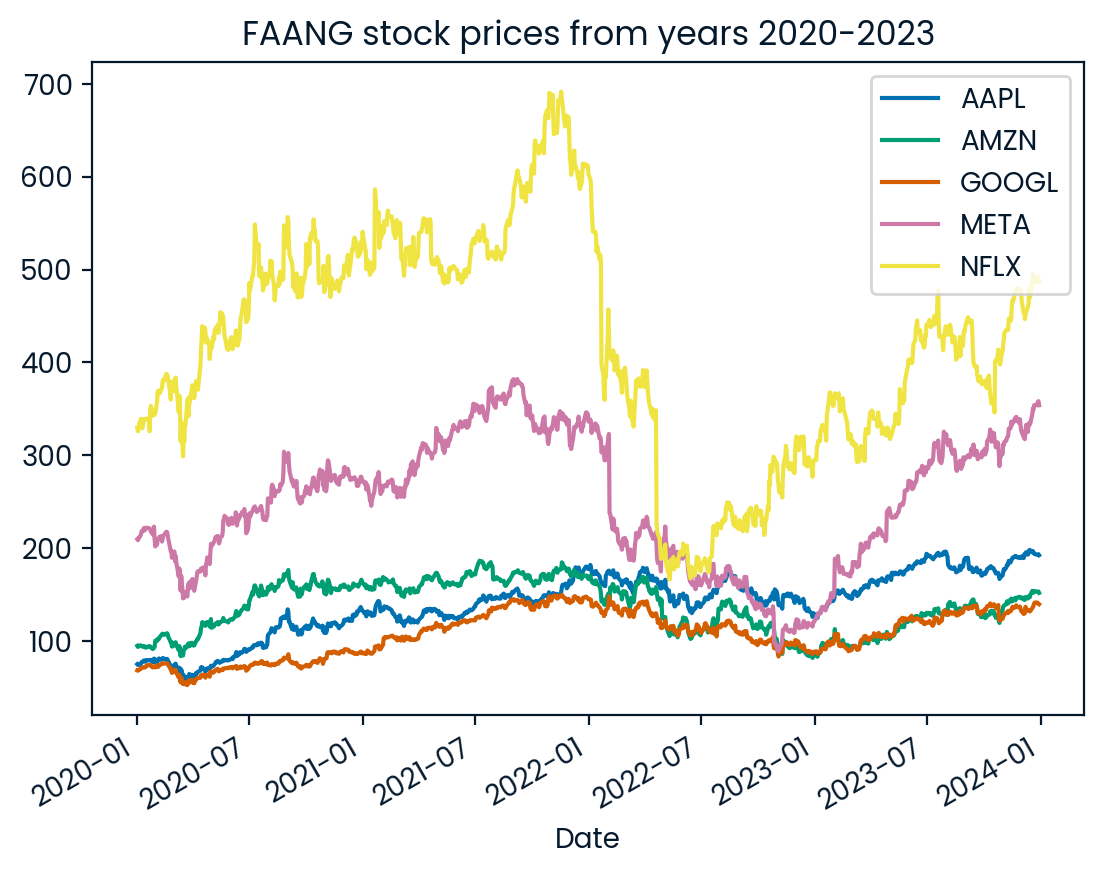

In [42]:
# Plotting the stock prices
stock_prices_df.plot(title="FAANG stock prices from years 2020-2023");

In [43]:
# Calculating Daily Returns of Stock
returns = stock_prices_df.pct_change().dropna()
returns.head()

,AAPL,AMZN,GOOGL,META,NFLX
Date,,,,,
2020-01-03,-0.009722,-0.012118,-0.005115,-0.005291,-0.011855
2020-01-06,0.007934,0.014827,0.026586,0.018834,0.030469
2020-01-07,-0.004670,0.002102,-0.001860,0.002164,-0.015127
2020-01-08,0.016086,-0.007762,0.007024,0.010138,0.025729
2020-01-09,0.021240,0.004757,0.010534,0.014311,-0.010611


<AxesSubplot: title={'center': 'Daily Returns of Eq. Weighted FAANG Port'}, xlabel='Date'>

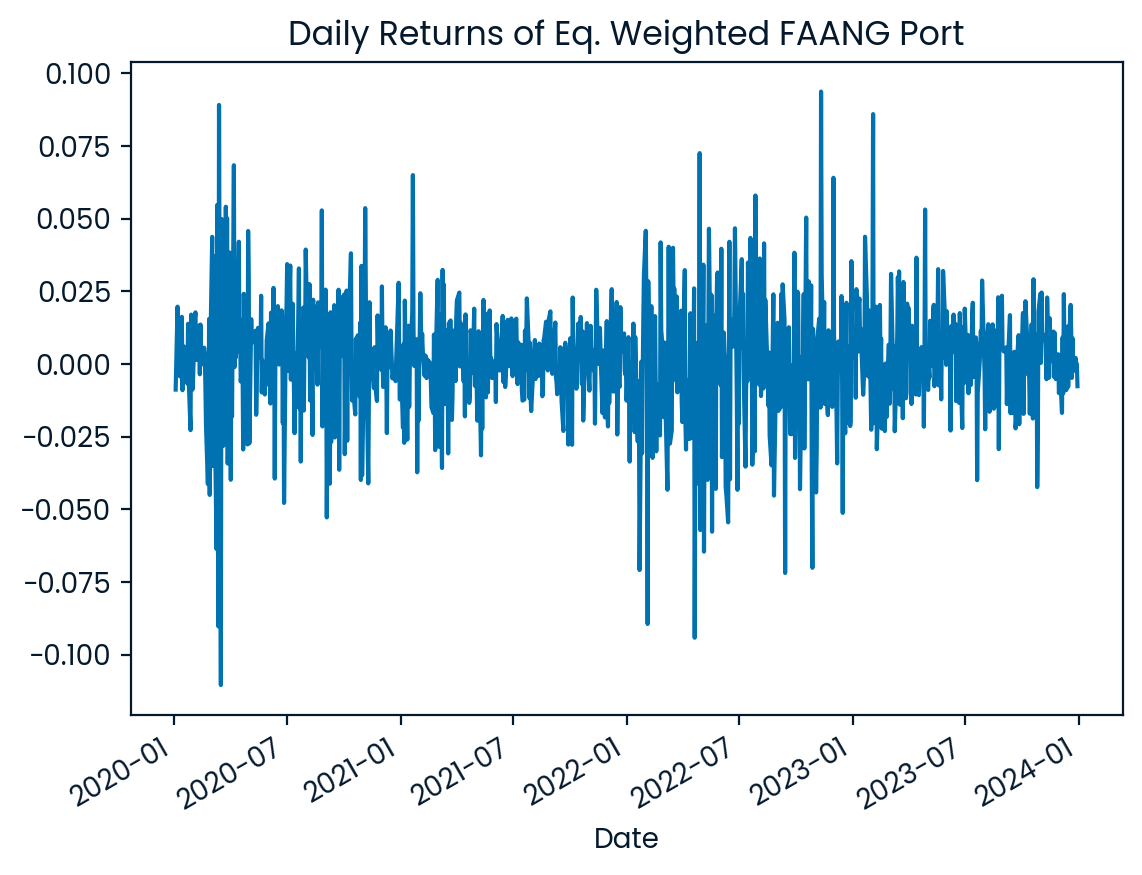

In [44]:
# Calculating an Equal Weighted Benchmark Portfolio
num_assets = stock_prices_df.shape[1]
weights = [1/num_assets] * num_assets
portfolio_returns = returns.dot(weights)
# Plotting the portfolio Returns
portfolio_returns.plot(title='Daily Returns of Eq. Weighted FAANG Port')

In [45]:
# Calculating Expected Daily Return of the Portfolio
benchmark_exp_return = portfolio_returns.mean()
print('Expected Daily Return', benchmark_exp_return)
# Calculating Annualized Sharpe Ratio of the Portfolio
portfolio_std = portfolio_returns.std()
sharpe_ratio_daily = benchmark_exp_return / portfolio_std
benchmark_sharpe_ratio = sharpe_ratio_daily * (252**0.5)
print('Annualized Sharpe Ratio', benchmark_sharpe_ratio)

Expected Daily Return 0.0009366970530650012
Annualized Sharpe Ratio 0.7221868020795013


In [46]:
# Calculating the Min Volatility Portfolio
avg_returns = returns.mean() * 252
cov_mat = returns.cov() * 252
ef = EfficientFrontier(avg_returns, cov_mat)
min_vol_weights = ef.min_volatility()
cleaned_weights = ef.clean_weights()
mv_portfolio = pd.Series(cleaned_weights)
mv_portfolio_vol = ef.portfolio_performance()[1]
print('Minimum Volatility Portfolio Weights')
print(mv_portfolio)
print('Minimum Volatility:', mv_portfolio_vol)

Minimum Volatility Portfolio Weights
AAPL     0.39842
AMZN     0.14911
GOOGL    0.38290
META     0.00000
NFLX     0.06957
dtype: float64
Minimum Volatility: 0.3030736711547463


In [47]:
# Calculating the Max Sharpe Ratio Portfolio
ef = EfficientFrontier(avg_returns, cov_mat)
ms_weights = ef.max_sharpe(risk_free_rate = 0)
cleaned_ms_weights = ef.clean_weights()
ms_portfolio = pd.Series(cleaned_ms_weights)
ms_portfolio_sharpe = ef.portfolio_performance(risk_free_rate = 0)[2]
print('Max Sharpe Ratio Portfolio Weights')
print(ms_portfolio)
print('Max Sharpe Ratio:', ms_portfolio_sharpe)

Max Sharpe Ratio Portfolio Weights
AAPL     0.78744
AMZN     0.00000
GOOGL    0.19970
META     0.00000
NFLX     0.01286
dtype: float64
Max Sharpe Ratio: 0.8821809421501468
